In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('raport_awarii.csv', encoding='utf-8-sig', sep=";")

df

,Zawiadomienie,Rodzaj zawiadomienia,Utworzono dnia,Początek zakłócenia,Pocz. zakłóc. (godz.),Koniec zakłócenia,Koniec zakłóc.(godz.),Przestój,Urządzenie,Lokalizacja funkc.,...,Nr zlecenia,Wpływ,Problem,Kod uszkodzenia,Tekst dot. szkody,Kod przyczyny,Ozn. lokaliz. funkc.,Line functional location,Ozn. lokaliz. funkc..1,Oznaczenie obiektu
0,12476707,PT,02.01.2025,02.01.2025,06:30:17,NaN,00:00:00,NaN,10117891.0,PLPA-PR-U11-010703-003,...,5.000021e+10,NaN,NaN,NaN,NaN,NaN,MODELATOR RAFFAELLO,PLPA-PR-U11-010703,RAFFAELLO LINIA 2,1 - Wałek czyszczący formy
1,12476648,1P,02.01.2025,02.01.2025,10:27:15,02.01.2025,12:40:14,X,10226078.0,PLPA-PR-U12-010801-002,...,5.000021e+10,2.0,ZPM5,105.0,Zatkanie,108.0,KINDER CARDS MODELATOR,PLPA-PR-U12-010801,KINDER CARDS,1-Instalacja tech. kremu ciemnego
2,12476708,PT,02.01.2025,02.01.2025,06:32:26,NaN,00:00:00,NaN,10117907.0,PLPA-PR-U11-010703-003,...,5.000021e+10,NaN,NaN,NaN,NaN,NaN,MODELATOR RAFFAELLO,PLPA-PR-U11-010703,RAFFAELLO LINIA 2,1-Składacz form 1 002104
3,12476709,PT,02.01.2025,02.01.2025,06:33:21,NaN,00:00:00,NaN,10117921.0,PLPA-PR-U11-010703-003,...,5.000021e+10,NaN,NaN,NaN,NaN,NaN,MODELATOR RAFFAELLO,PLPA-PR-U11-010703,RAFFAELLO LINIA 2,1-Składacz form 2 005066
4,12476881,1P,02.01.2025,02.01.2025,08:21:02,NaN,00:00:00,X,10116830.0,PLPA-PR-U11-010717,...,NaN,1.0,NaN,NaN,NaN,NaN,LINIA PAKUJĄCA ERMETICO RAFFAELLO,PLPA-PR-U11,UGP11 RAFFAELLO,1-Maszyna pakująca Ermetico 2 003231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6304,12707605,PT,30.06.2025,30.06.2025,13:58:44,NaN,00:00:00,NaN,10226868.0,PLPA-PR-U12-010801-003,...,5.000023e+10,NaN,NaN,NaN,NaN,NaN,KINDER CARDS PAKOWANIE,PLPA-PR-U12-010801,KINDER CARDS,2-Pakowaczka pozioma
6305,12707606,PT,30.06.2025,30.06.2025,13:59:42,NaN,00:00:00,NaN,10226877.0,PLPA-PR-U12-010801-003,...,5.000023e+10,NaN,NaN,NaN,NaN,NaN,KINDER CARDS PAKOWANIE,PLPA-PR-U12-010801,KINDER CARDS,2-Pakowaczka pozioma
6306,12707607,PT,30.06.2025,30.06.2025,14:03:23,NaN,00:00:00,NaN,10226889.0,PLPA-PR-U12-010801-003,...,5.000023e+10,NaN,NaN,NaN,NaN,NaN,KINDER CARDS PAKOWANIE,PLPA-PR-U12-010801,KINDER CARDS,2-Pakowaczka pozioma
6307,12707608,PT,30.06.2025,30.06.2025,14:04:44,NaN,00:00:00,NaN,10226883.0,PLPA-PR-U12-010801-003,...,5.000023e+10,NaN,NaN,NaN,NaN,NaN,KINDER CARDS PAKOWANIE,PLPA-PR-U12-010801,KINDER CARDS,2-Pakowaczka pozioma


In [4]:
df1 = pd.read_csv('test.csv', encoding='utf-8-sig', sep=";")

df1

,miesiąc,tydzień,Linia,Rodzina,QL/TOT,QL/TOT2,% Dvt,Zmiana,Zmiana3,Q/Zm.,...,% E/LINIA,% E/LINIA14,% E/Prac.,% E/Prac.15,% Zysku,% Zysku16,suma,% scrap,% scrap17,oszczędności
0,NaN,NaN,NaN,NaN,Akt,Pln,Produk.,Czysty,Prg,Standard,...,Eff,Obb,Eff,Obb,Eff,Obb,oszczęd,Eff,Std.,Godz./Prac.
1,02.09 - 08.09,36,10401.0,I210,"1 398,797","1 397,894","0,065","9,991","9,985","158,976",...,"88,065","88,060","74,111","88,060","88,065","88,064","-429,751","3,082","3,102","429,751"
2,NaN,36,10401.0,I211,"108,192","108,115","0,071","0,773","0,772","158,976",...,"88,070","88,060","96,449","88,060","88,070","88,064","-410,412","2,819","2,900","-19,340"
3,NaN,36,10401.0,I212,"1 079,160","1 078,577","0,054","7,707","7,704","158,976",...,"88,077","88,060","134,293","88,060","88,077","88,064","684,778","2,657","3,202","-1 095,190"
4,09.09 - 15.09,37,10401.0,I211,"477,147","476,201","0,199","3,408","3,401","158,976",...,"88,065","88,060","79,148","88,060","88,065","88,064","570,817","2,898","2,900","113,961"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,NaN,W26,10716.0,1526,"115,330","115,012","0,277","4,090","4,091","35,643",...,"79,113","78,870","79,127","78,870","79,113","78,874",NaN,NaN,NaN,NaN
357,NaN,W26,10717.0,1519,"1 015,822","1 118,991","-9,220","18,650","18,650","77,112",...,"70,637","77,810","77,815","77,810","70,637","77,809",NaN,NaN,NaN,NaN
358,NaN,W26,10718.0,1510,"15,422","14,982","2,941","0,525","0,510","36,720",...,"80,076","80,070","81,455","80,070","80,076","80,065",NaN,NaN,NaN,NaN
359,NaN,W26,10721.0,1516,"166,464","165,012","0,880","17,516","17,370","11,750",...,"80,877","80,850","80,903","80,850","80,877","80,848",NaN,NaN,NaN,NaN


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# ---------- 1. Load the CSVs ----------
prod = pd.read_csv('test.csv', sep=';')
notif = pd.read_csv('raport_awarii.csv', sep=';')

# ---------- 2. Helper for Polish 1 234,56 -> 1234.56 ----------
def clean_numeric(series):
    """Convert strings with spaces and comma decimals to float"""
    return pd.to_numeric(
        series.astype(str)
              .str.replace(r'[^\d,.-]', '', regex=True)  # keep digits/.-,
              .str.replace(',', '.'),
        errors='coerce'
    )

# ---------- 3. Prep production effectiveness ----------
prod['Linia_id'] = prod['Linia']
prod_eff = (
    prod[['Linia_id', '% E/LINIA']]
    .rename(columns={'% E/LINIA': 'eff_str'})
    .assign(eff=lambda d: clean_numeric(d['eff_str']))
    .dropna(subset=['eff'])
    .groupby('Linia_id', as_index=False)['eff'].mean()
)

# ---------- 4. Prep downtime ----------
notif['downtime_h'] = clean_numeric(notif['Czas przestoju'])

# map “PLPA-PR-U11-010703” -> 10703  (last 5 digits)
notif['Linia_id'] = (
    notif['Line functional location']
    .str.extract(r'(\d{5})$')[0]
    .astype(float)           # float to align with prod Linia_id dtype
)

downtime = (
    notif.groupby('Linia_id', as_index=False)['downtime_h']
         .sum()
         .dropna()
)

# ---------- 5. Merge ----------
merged = pd.merge(prod_eff, downtime, on='Linia_id', how='inner')

# Show the merged table to the user
merged.head(15)

# # ---------- 6. Scatter plot ----------
# fig, ax = plt.subplots()
# ax.scatter(merged['downtime_h'], merged['eff'])
# ax.set_xlabel('Total downtime per line [h]')
# ax.set_ylabel('% Eff LINIA (avg)')
# ax.set_title('Effectiveness vs Downtime by Line')
# plt.show()

,Linia_id,eff,downtime_h
0,10401.0,87.809848,360.2333
1,10703.0,87.626917,2164.1803
2,10801.0,83.464042,1089.1921
3,11312.0,82.662731,3171.0393


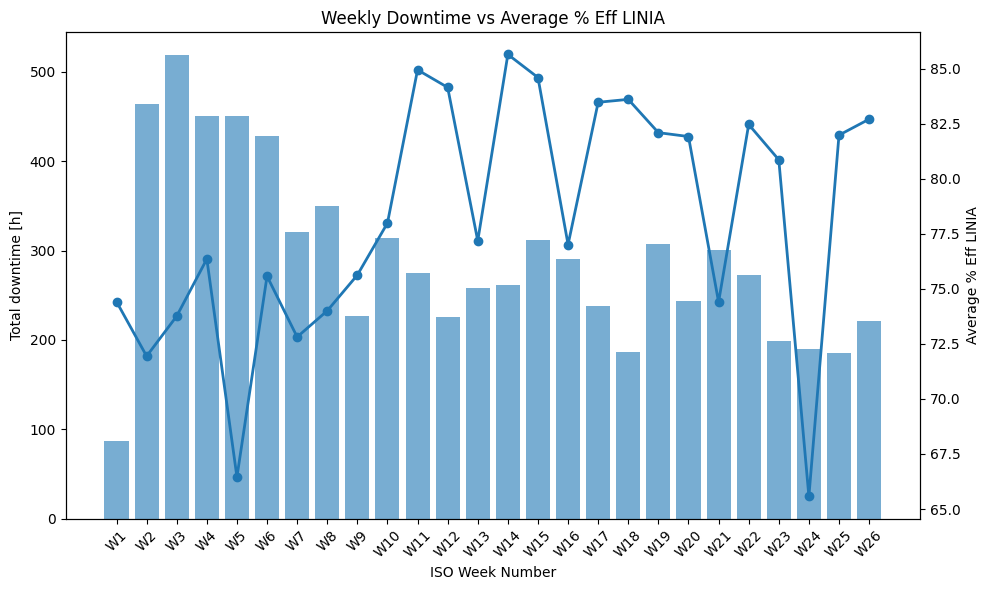

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# ---------- 1. Load data again ----------
prod = pd.read_csv('test.csv', sep=';')
notif = pd.read_csv('raport_awarii.csv', sep=';')

# ---------- 2. Helper for numeric ----------
def clean_numeric(series):
    return pd.to_numeric(
        series.astype(str)
              .str.replace(r'[^\d,.-]', '', regex=True)
              .str.replace(',', '.'),
        errors='coerce'
    )

# ---------- 3. Week extraction in production ----------
week_col = [c for c in prod.columns if c.lower().startswith('tydzie')][0]
prod['week_num'] = (
    prod[week_col]
    .astype(str)
    .str.extract(r'(\d+)')[0]
    .astype(float)
)
prod['eff'] = clean_numeric(prod['% E/LINIA'])

prod_week = (
    prod.dropna(subset=['eff', 'week_num'])
        .groupby('week_num', as_index=False)['eff']
        .mean()
        .rename(columns={'eff': 'avg_eff'})
)

# ---------- 4. Downtime per week ----------
notif_date_col = [c for c in notif.columns if 'Utworzono' in c][0]
notif['date_created'] = pd.to_datetime(notif[notif_date_col], dayfirst=True, errors='coerce')
notif['week_num'] = notif['date_created'].dt.isocalendar().week.astype(float)
notif['downtime_h'] = clean_numeric(notif['Czas przestoju'])

downtime_week = (
    notif.dropna(subset=['week_num', 'downtime_h'])
         .groupby('week_num', as_index=False)['downtime_h']
         .sum()
         .rename(columns={'downtime_h': 'total_downtime_h'})
)

# ---------- 5. Merge ----------
merged_week = pd.merge(prod_week, downtime_week, on='week_num', how='inner').sort_values('week_num')

# ---------- 6. Plot: Weeks on X‑axis ----------
fig, ax1 = plt.subplots(figsize=(10, 6))

# bar for downtime
ax1.bar(merged_week['week_num'], merged_week['total_downtime_h'], alpha=0.6)
ax1.set_xlabel('ISO Week Number')
ax1.set_ylabel('Total downtime [h]', fontsize=10)
ax1.set_title('Weekly Downtime vs Average % Eff LINIA')

# line for efficiency on secondary axis
ax2 = ax1.twinx()
ax2.plot(merged_week['week_num'], merged_week['avg_eff'], marker='o', linewidth=2)
ax2.set_ylabel('Average % Eff LINIA', fontsize=10)

# tidy x‑axis labels
ax1.set_xticks(merged_week['week_num'])
ax1.set_xticklabels([f'W{int(w)}' for w in merged_week['week_num']], rotation=45)

plt.tight_layout()
plt.show()


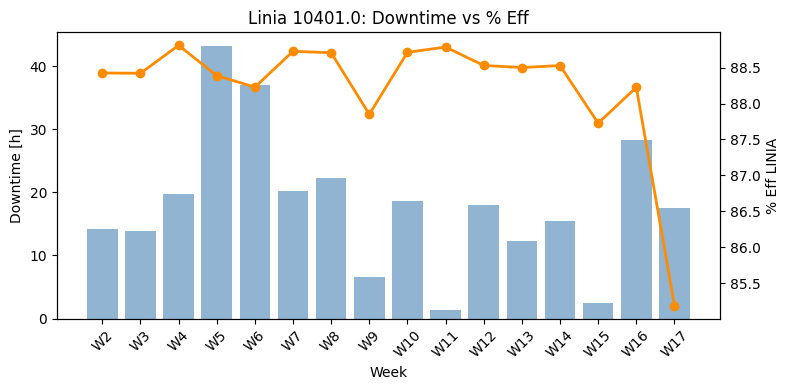

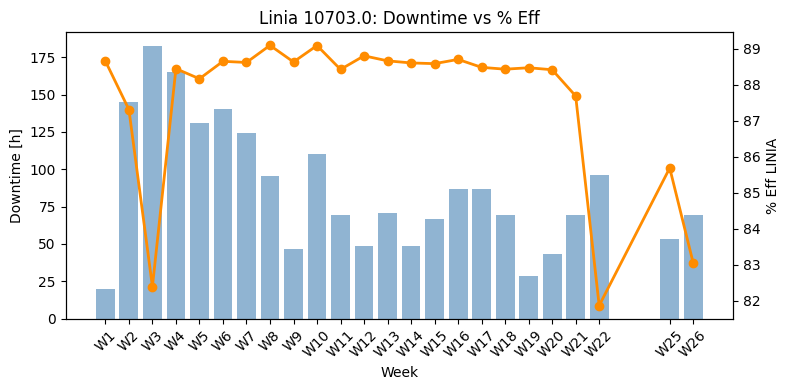

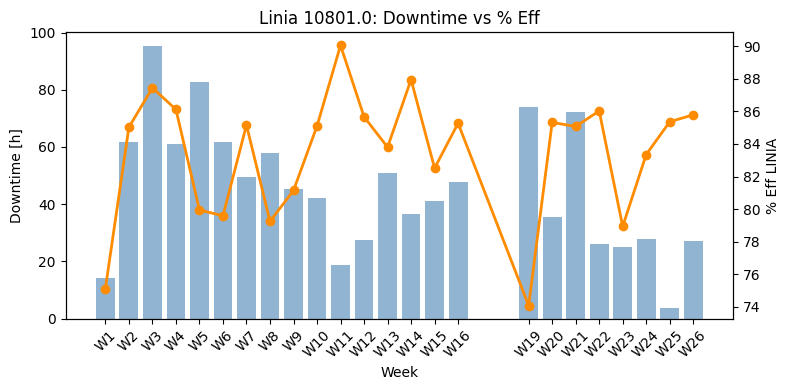

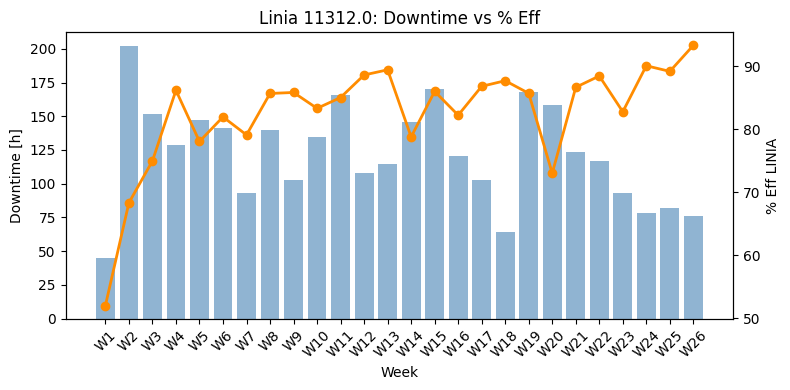

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from math import ceil

# ---------- 1. Load CSVs ----------
prod  = pd.read_csv('test.csv', sep=';')
notif = pd.read_csv('raport_awarii.csv', sep=';')

# ---------- 2. Helpers ----------
def clean_numeric(series):
    return pd.to_numeric(series.astype(str)
                         .str.replace(r'[^\d,.-]', '', regex=True)
                         .str.replace(',', '.'),
                         errors='coerce')

# ---------- 3. Week + line prep in production ----------
week_col = [c for c in prod.columns if c.lower().startswith('tydzie')][0]

prod['week_num'] = (prod[week_col].astype(str)
                                  .str.extract(r'(\d+)')[0]
                                  .astype(float))
prod['Linia_id'] = prod['Linia']
prod['eff']      = clean_numeric(prod['% E/LINIA'])

prod_wk_line = (prod.dropna(subset=['eff','week_num'])
                     .groupby(['Linia_id','week_num'], as_index=False)['eff']
                     .mean()
                     .rename(columns={'eff':'avg_eff'}))

# ---------- 4. Week + line prep in notifications ----------
notif_date_col = [c for c in notif.columns if 'Utworzono' in c][0]
notif['date_created'] = pd.to_datetime(notif[notif_date_col], dayfirst=True, errors='coerce')
notif['week_num'] = notif['date_created'].dt.isocalendar().week.astype(float)

notif['Linia_id'] = (
    notif['Line functional location']
    .str.extract(r'(\d{5})$')[0]
    .astype(float)           # float to align with prod Linia_id dtype
)
notif['downtime_h'] = clean_numeric(notif['Czas przestoju'])

down_wk_line = (notif.dropna(subset=['week_num','downtime_h','Linia_id'])
                     .groupby(['Linia_id','week_num'], as_index=False)['downtime_h']
                     .sum()
                     .rename(columns={'downtime_h':'total_downtime_h'}))

# ---------- 5. Merge per line & week ----------
df = pd.merge(prod_wk_line, down_wk_line,
              on=['Linia_id','week_num'], how='inner')

# ---------- 6. Plot loop ----------
unique_lines = sorted(df['Linia_id'].unique())

for linia in unique_lines:
    sub = df[df['Linia_id'] == linia].sort_values('week_num')

    fig, ax1 = plt.subplots(figsize=(8, 4))
    ax1.bar(sub['week_num'], sub['total_downtime_h'], alpha=0.6, color='steelblue')
    ax1.set_xlabel('Week')
    ax1.set_ylabel('Downtime [h]')
    ax1.set_title(f'Linia {linia}: Downtime vs % Eff')

    ax2 = ax1.twinx()
    ax2.plot(sub['week_num'], sub['avg_eff'], marker='o', linewidth=2, color='darkorange')
    ax2.set_ylabel('% Eff LINIA')

    ax1.set_xticks(sub['week_num'])
    ax1.set_xticklabels([f'W{int(w)}' for w in sub['week_num']], rotation=45)

    plt.tight_layout()
    plt.show()
